In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


file = "WA Police Force Crime Timeseries.xlsx"
WAstats = pd.read_excel(file,sheet_name = "Data")

WAstats.fillna(0, inplace = True)


In [4]:
#list of regions
regionlist = WAstats['Website Region'].unique()
regionlist

array(['Armadale District', 'Cannington District', 'Fremantle District',
       'Goldfields-Esperance District', 'Great Southern District',
       'Joondalup District', 'Kimberley District', 'Mandurah District',
       'Metropolitan Region', 'Mid West-Gascoyne District',
       'Midland District', 'Mirrabooka District', 'Perth District',
       'Pilbara District', 'Regional WA Region', 'South West District',
       'Western Australia', 'Wheatbelt District'], dtype=object)

In [5]:
#list of crimes Lvl1
crimecatagories = WAstats[['WAPOL_Hierarchy_Lvl1','WAPOL_Hierarchy_Lvl2']].value_counts().reset_index()
crimecatagories.drop(columns=[0], inplace = True)
crimecatagories

,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_Lvl2
0,Threatening Behaviour (Non-Family),Threatening Behaviour (Non-Family)
1,Cultivate or Manufacture Drugs,Drug Offences
2,Kidnapping / Child Stealing,Deprivation of Liberty
3,Graffiti,Graffiti
4,Fraud (Not Elsewhere Classified),Fraud & Related Offences
5,Fraud (Credit Card),Fraud & Related Offences
6,Forgery,Fraud & Related Offences
7,Drug Possession,Drug Offences
8,Drug Dealing,Drug Offences
9,Driving Causing Death,Homicide


In [6]:
#list of crimes lvl2
basiccrimedesc = WAstats['WAPOL_Hierarchy_Lvl2'].unique()
basiccrimedesc

array(['Homicide', 'Recent Sexual Offences', 'Historical Sexual Offences',
       'Assault (Family)', 'Assault (Non-Family)',
       'Threatening Behaviour (Family)',
       'Threatening Behaviour (Non-Family)', 'Deprivation of Liberty',
       'Robbery', 'Burglary', 'Stealing of Motor Vehicle', 'Stealing',
       'Property Damage', 'Arson', 'Drug Offences',
       'Receiving and Possession of Stolen Property',
       'Regulated Weapons Offences', 'Graffiti',
       'Fraud & Related Offences', 'Breach of Violence Restraint Order'],
      dtype=object)

## Regional Data

In [10]:
#Regional DF
Regional_df = WAstats[WAstats["Website Region"]=="Regional WA Region"]
Regional_df.head()

,Website Region,WAPOL_Hierarchy_order_Lvl1,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_order_Lvl2,WAPOL_Hierarchy_Lvl2,Period,Year,Key,MonthYear,COUNT_of_Offnc_ID
117600,Regional WA Region,1.1,Murder,1,Homicide,2007-01-01,2006-07,Regional WA RegionMurderHomicide12007,12007,0.0
117601,Regional WA Region,1.1,Murder,1,Homicide,2007-02-01,2006-07,Regional WA RegionMurderHomicide22007,22007,0.0
117602,Regional WA Region,1.1,Murder,1,Homicide,2007-03-01,2006-07,Regional WA RegionMurderHomicide32007,32007,0.0
117603,Regional WA Region,1.1,Murder,1,Homicide,2007-04-01,2006-07,Regional WA RegionMurderHomicide42007,42007,2.0
117604,Regional WA Region,1.1,Murder,1,Homicide,2007-05-01,2006-07,Regional WA RegionMurderHomicide52007,52007,1.0


In [20]:
Plotting_df = Regional_df.groupby(['WAPOL_Hierarchy_Lvl2','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
Plotting_df = Plotting_df[Plotting_df["Period"]>dt.datetime(year=2019, month = 1, day = 1)]
Plotting_df['Period'] = Plotting_df['Period'].dt.strftime('%Y-%m')

In [21]:
Plotting = Plotting_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
Plotting

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2019-02,31.0,602.0,287.0,447.0,607.0,10.0,890.0,215.0,30.0,38.0,1.0,724.0,77.0,74.0,108.0,14.0,1151.0,121.0,86.0,76.0
2019-03,35.0,759.0,326.0,408.0,904.0,2.0,861.0,322.0,37.0,29.0,2.0,765.0,97.0,99.0,134.0,15.0,1216.0,198.0,94.0,95.0
2019-04,25.0,679.0,238.0,315.0,768.0,5.0,780.0,199.0,26.0,47.0,4.0,696.0,58.0,57.0,95.0,20.0,1253.0,136.0,90.0,70.0
2019-05,22.0,629.0,257.0,288.0,657.0,7.0,804.0,267.0,35.0,54.0,2.0,730.0,88.0,117.0,121.0,12.0,1192.0,144.0,94.0,80.0
2019-06,25.0,554.0,214.0,294.0,609.0,2.0,730.0,235.0,29.0,50.0,2.0,612.0,93.0,61.0,89.0,9.0,971.0,101.0,73.0,40.0
2019-07,30.0,619.0,230.0,323.0,470.0,6.0,790.0,189.0,21.0,45.0,1.0,633.0,78.0,75.0,126.0,10.0,927.0,90.0,70.0,66.0
2019-08,20.0,653.0,284.0,326.0,578.0,6.0,911.0,190.0,26.0,53.0,5.0,629.0,90.0,80.0,165.0,13.0,1014.0,87.0,121.0,70.0
2019-09,25.0,620.0,291.0,281.0,631.0,3.0,898.0,137.0,34.0,31.0,2.0,687.0,70.0,98.0,99.0,14.0,1078.0,162.0,80.0,69.0
2019-10,42.0,665.0,271.0,381.0,771.0,2.0,659.0,286.0,31.0,62.0,4.0,815.0,61.0,95.0,75.0,23.0,1115.0,139.0,95.0,59.0


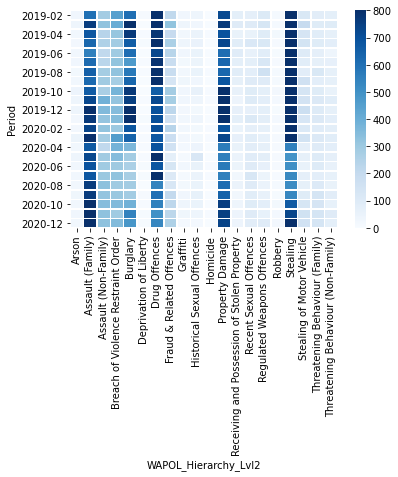

In [8]:
ax = sns.heatmap(Plotting, linewidth=0.5,cmap="Blues", vmin= 0, vmax=800)
plt.show()

In [22]:
#key crimes
TopCrimes = Plotting_df.groupby('WAPOL_Hierarchy_Lvl2')["COUNT_of_Offnc_ID"].sum().sort_values(ascending = False)
keycrimes = TopCrimes[0:6].index.tolist()
keycrimes

['Stealing',
 'Assault (Family)',
 'Drug Offences',
 'Property Damage',
 'Burglary',
 'Breach of Violence Restraint Order']

In [10]:
keycrimes_df = Plotting_df[Plotting_df['WAPOL_Hierarchy_Lvl2'].isin(keycrimes)]
keycrimespivot = keycrimes_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
keycrimespivot

WAPOL_Hierarchy_Lvl2,Assault (Family),Breach of Violence Restraint Order,Burglary,Drug Offences,Property Damage,Stealing
Period,,,,,,
2019-02,602.0,447.0,607.0,890.0,724.0,1151.0
2019-03,759.0,408.0,904.0,861.0,765.0,1216.0
2019-04,679.0,315.0,768.0,780.0,696.0,1253.0
2019-05,629.0,288.0,657.0,804.0,730.0,1192.0
2019-06,554.0,294.0,609.0,730.0,612.0,971.0
2019-07,619.0,323.0,470.0,790.0,633.0,927.0
2019-08,653.0,326.0,578.0,911.0,629.0,1014.0
2019-09,620.0,281.0,631.0,898.0,687.0,1078.0
2019-10,665.0,381.0,771.0,659.0,815.0,1115.0


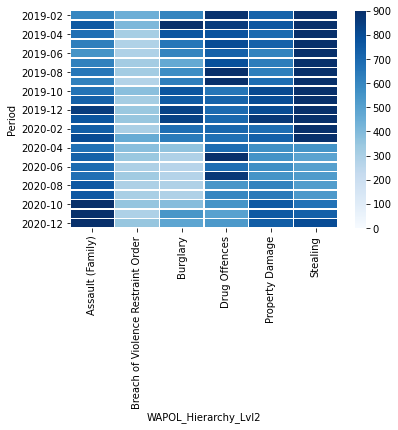

In [11]:
ax = sns.heatmap(keycrimespivot, linewidth=0.5,cmap="Blues", vmin= 0, vmax=900)
plt.show()

NameError: name 'keycrimespivot' is not defined

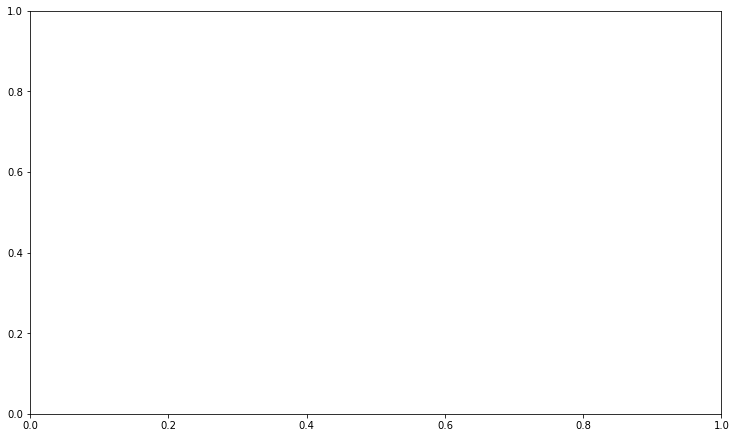

In [66]:
#line graph of key crimes 2019 to 2020
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(keycrimespivot)
t = axes.text(
    "2020-05", 1200, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))

#plt.annotate("Start of lockdown", ("2020-03",1200), fontsize = 12, color = "blue",alpha=0.5, arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
plt.vlines("2020-03",ymin = 0, ymax = 1400,linestyles='dashed', alpha=0.5)
plt.ylim(0,1350)
plt.xticks(rotation=45)
plt.legend(keycrimespivot.columns,bbox_to_anchor = (1.4, 1.0))
plt.show()   

### Regional 2017-2021

In [13]:

y2017_df = Regional_df[Regional_df["Period"]>dt.datetime(year=2017, month = 1, day = 1)]
y2017_df['Year'] = y2017_df['Period'].dt.strftime('%Y')
yearly_df = y2017_df.groupby(['WAPOL_Hierarchy_Lvl2','Year'])['COUNT_of_Offnc_ID'].sum().reset_index()
yearly_df = yearly_df[yearly_df['WAPOL_Hierarchy_Lvl2'].isin(keycrimes)]

<ipython-input-13-5a9ddc2829e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2017_df['Year'] = y2017_df['Period'].dt.strftime('%Y')


In [14]:
yearly_pivot = yearly_df.pivot(index='Year', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
yearly_pivot

WAPOL_Hierarchy_Lvl2,Assault (Family),Breach of Violence Restraint Order,Burglary,Drug Offences,Property Damage,Stealing
Year,,,,,,
2017,6609.0,3052.0,8105.0,9018.0,8912.0,13118.0
2018,7634.0,3770.0,8021.0,10609.0,8538.0,13228.0
2019,8058.0,4055.0,8357.0,9379.0,8696.0,13377.0
2020,9396.0,4085.0,5366.0,8018.0,8050.0,8630.0


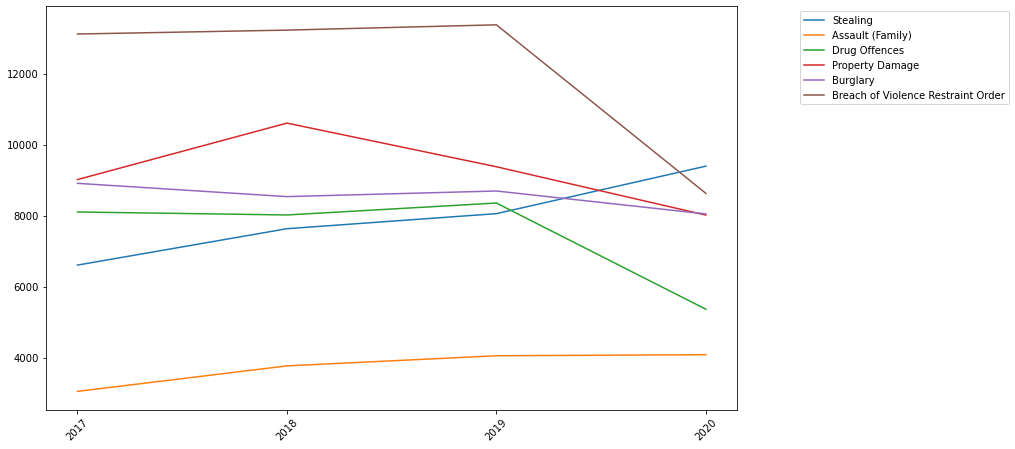

In [15]:
#line graph key crimes 
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(yearly_pivot)

plt.xticks(rotation=45)
plt.legend(keycrimes,bbox_to_anchor = (1.4, 1.0))
plt.show()   

In [16]:
yearly_pivot = yearly_pivot.reset_index().set_index('Year')
crimes = yearly_pivot.columns.tolist()
years = yearly_pivot.index.tolist()
crimes

['Assault (Family)',
 'Breach of Violence Restraint Order',
 'Burglary',
 'Drug Offences',
 'Property Damage',
 'Stealing']

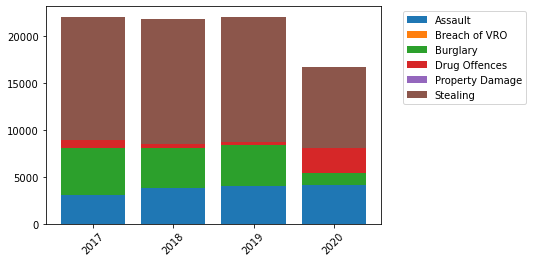

In [17]:

Assault = yearly_pivot[crimes[0]]
BreachofVRO = yearly_pivot[crimes[1]]
Burglary =yearly_pivot[crimes[2]]
Drug =yearly_pivot[crimes[3]]
PropertyDamage =yearly_pivot[crimes[4]]
Stealing = yearly_pivot[crimes[5]]

#plt.bar(crimes, yearly_pivot[crimes[1]] )
fig, ax = plt.subplots()

ax.bar(years, Assault, label = "Assault")
ax.bar(years,BreachofVRO,bottom=Assault, label = 'Breach of VRO')
ax.bar(years,Burglary,bottom=BreachofVRO, label = 'Burglary')
ax.bar(years,Drug,bottom=Burglary, label = 'Drug Offences')
ax.bar(years,PropertyDamage,bottom=Drug, label = 'Property Damage')
ax.bar(years,Stealing,bottom=PropertyDamage, label = 'Stealing')


ax.legend(bbox_to_anchor = (1.05, 1.0))
plt.xticks(rotation=45)
plt.show()     

In [18]:
mean = yearly_pivot.mean()
mean

WAPOL_Hierarchy_Lvl2
Assault (Family)                       7924.25
Breach of Violence Restraint Order     3740.50
Burglary                               7462.25
Drug Offences                          9256.00
Property Damage                        8549.00
Stealing                              12088.25
dtype: float64

In [19]:

Plotting2 = Plotting.reset_index()

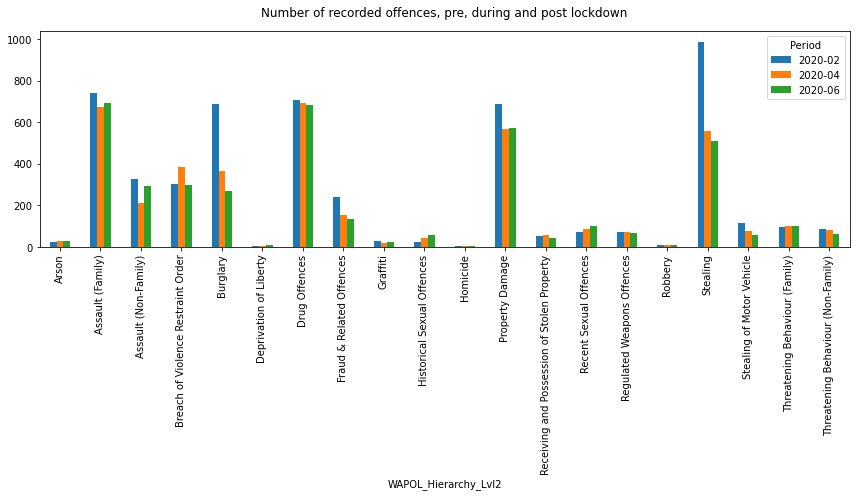

In [39]:

Lockdownperiods = Plotting2.loc[(Plotting2["Period"]=='2020-02')|(Plotting2["Period"]=='2020-04')|(Plotting2["Period"]=='2020-06')].set_index('Period')
Transposed = Lockdownperiods.T
Transposed.plot.bar(figsize=(12,7))
plt.title("Number of recorded offences, pre, during and post lockdown", pad=15)
plt.tight_layout()
plt.savefig("crimesoverperiodbar.png",bbox_inches='tight')
plt.show()


In [36]:
Transposed

Period,2020-02,2020-04,2020-06
WAPOL_Hierarchy_Lvl2,,,
Arson,24.0,27.0,26.0
Assault (Family),739.0,674.0,692.0
Assault (Non-Family),324.0,213.0,294.0
Breach of Violence Restraint Order,304.0,383.0,297.0
Burglary,685.0,366.0,268.0
Deprivation of Liberty,4.0,6.0,8.0
Drug Offences,707.0,692.0,683.0
Fraud & Related Offences,238.0,154.0,132.0
Graffiti,27.0,16.0,25.0


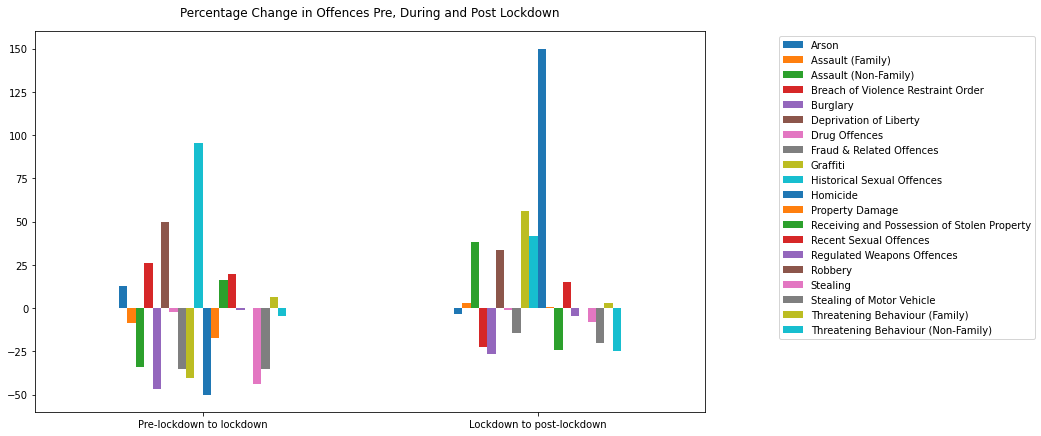

In [40]:

Change = Lockdownperiods.pct_change().multiply(100).round(2)
Change.dropna(axis='rows', inplace=True)
Renamed = Change.copy()
Renamed.index =["Pre-lockdown to lockdown","Lockdown to post-lockdown"]
Renamed.plot(kind ='bar',figsize=(12,7))

plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.title("Percentage Change in Offences Pre, During and Post Lockdown", pad=15)
plt.xticks(rotation=360)
plt.savefig("crimespercentchange.png",bbox_inches='tight')
plt.show()

In [28]:
Change

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2020-04,12.5,-8.80,-34.26,25.99,-46.57,50.00,-2.12,-35.29,-40.74,95.24,-50.0,-17.56,16.00,19.44,-1.43,0.0,-43.77,-35.09,6.45,-4.76
2020-06,-3.7,2.67,38.03,-22.45,-26.78,33.33,-1.30,-14.29,56.25,41.46,150.0,0.70,-24.14,15.12,-4.35,0.0,-8.29,-20.27,3.03,-25.00


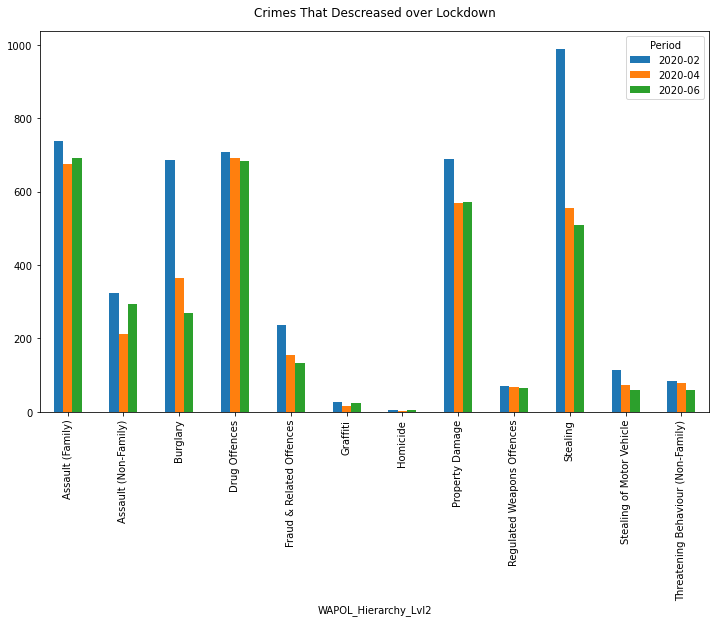

In [41]:
ChangeTransposed = Change.T
Crimesincoverlock = ChangeTransposed[ChangeTransposed["2020-04"]>0]
Crimesdecoverlock = ChangeTransposed[ChangeTransposed["2020-04"]<0]
Crimesdecoverlock.index
Transposed.loc[Crimesdecoverlock.index].plot.bar(figsize=(12,7))
plt.title("Crimes That Descreased over Lockdown", pad=15)
plt.savefig("decreasingcrimes.png",bbox_inches='tight')
plt.show()

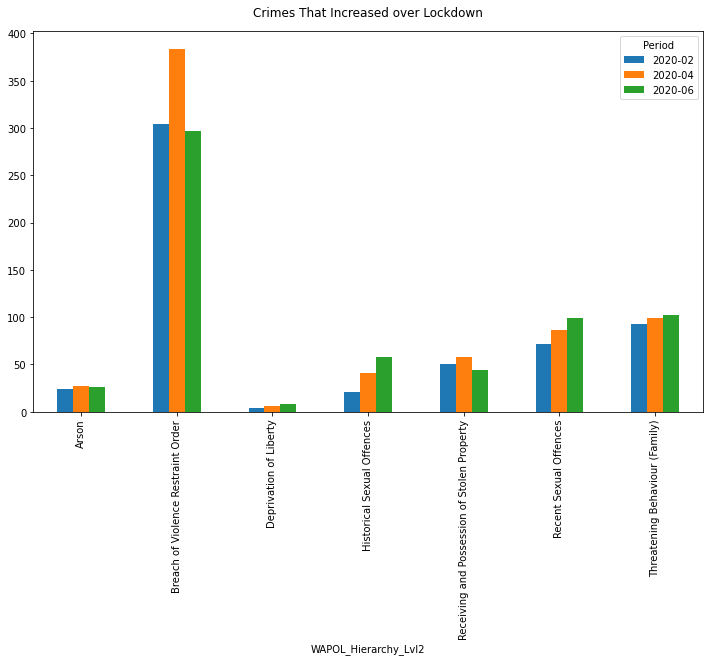

In [42]:
Transposed.loc[Crimesincoverlock.index].plot.bar(figsize=(12,7))
plt.title("Crimes That Increased over Lockdown", pad=15)
plt.savefig("increasingcrimes.png",bbox_inches='tight')
plt.show()

In [ ]:
for index in Change.index:
    print(Change.loc[index])

In [ ]:
Plotting2 = Plotting.reset_index()
prelockdown = Plotting2.loc[Plotting2["Period"]=='2020-02']
atlockdown = Plotting2.loc[Plotting2["Period"]=='2020-03']
postlockdown = Plotting2.loc[Plotting2["Period"]=='2020-06']

x = prelockdown - atlockdown
type(prelockdown)
Plotting2.set_index('Period').diff()

In [ ]:
prelockdown

In [ ]:
lvl1group_df = Regional_df.groupby(['WAPOL_Hierarchy_Lvl1','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
lvl1group_df = lvl1group_df[lvl1group_df["Period"]>dt.datetime(year=2017, month = 1, day = 1)]
lvl1group_df['Period'] = lvl1group_df['Period'].dt.strftime('%Y-%m')

In [ ]:

pivotlvl1 = lvl1group_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl1', values='COUNT_of_Offnc_ID')
pivotlvl1

In [ ]:
fig= plt.figure(figsize=(12,7))
ax = sns.heatmap(pivotlvl1, linewidth=0.5,cmap="Blues", vmin= 0, vmax=1000)
plt.show()

In [ ]:
plt.bar(Plotting)

In [ ]:
a = 0
fig, axs = plt.subplots(5,2, sharex=True, sharey=False)
axs = axs.ravel()

for crime in basiccrimedesc:
    x = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period']
    y = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID']   
    axs[a].plot(x,y)
    a += 1
plt.figure(figsize=(20,12))
plt.savefig("Crime.png")
 
plt.show()        




In [ ]:
for crime in keycrimes:
    x = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['Period']
    y = plot_df[plot_df["WAPOL_Hierarchy_Lvl2"]==crime]['COUNT_of_Offnc_ID']  
    plt.scatter(x,y, label=crime)
plt.legend(bbox_to_anchor = (1.05, 1.0))
plt.xticks(rotation=45)
plt.show()     

## Metro Data

In [85]:
#Regional DF
WA_df = WAstats[WAstats["Website Region"]=="Western Australia"]
WA_df.head()

,Website Region,WAPOL_Hierarchy_order_Lvl1,WAPOL_Hierarchy_Lvl1,WAPOL_Hierarchy_order_Lvl2,WAPOL_Hierarchy_Lvl2,Period,Year,Key,MonthYear,COUNT_of_Offnc_ID
134400,Western Australia,1.1,Murder,1,Homicide,2007-01-01,2006-07,Western AustraliaMurderHomicide12007,12007,4.0
134401,Western Australia,1.1,Murder,1,Homicide,2007-02-01,2006-07,Western AustraliaMurderHomicide22007,22007,0.0
134402,Western Australia,1.1,Murder,1,Homicide,2007-03-01,2006-07,Western AustraliaMurderHomicide32007,32007,3.0
134403,Western Australia,1.1,Murder,1,Homicide,2007-04-01,2006-07,Western AustraliaMurderHomicide42007,42007,2.0
134404,Western Australia,1.1,Murder,1,Homicide,2007-05-01,2006-07,Western AustraliaMurderHomicide52007,52007,4.0


In [11]:
WAplot_df = WA_df.groupby(['WAPOL_Hierarchy_Lvl2','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
WAplot_df = WAplot_df[WAplot_df["Period"]>dt.datetime(year=2017, month = 1, day = 1)]
WAplot_df['Period'] = WAplot_df['Period'].dt.strftime('%Y-%m')

In [13]:
WA_Pivot = WAplot_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')

In [15]:
WA_Pivot

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Period,,,,,,,,,,,,,,,,,,,,
2017-02,81.0,1625.0,1016.0,839.0,2805.0,25.0,2489.0,1273.0,224.0,173.0,8.0,2757.0,426.0,494.0,341.0,99.0,7004.0,650.0,228.0,256.0
2017-03,89.0,1574.0,1064.0,1088.0,2810.0,14.0,3058.0,1449.0,162.0,232.0,8.0,2993.0,424.0,301.0,451.0,112.0,7367.0,646.0,272.0,372.0
2017-04,84.0,1599.0,1067.0,718.0,2446.0,33.0,2653.0,928.0,154.0,163.0,9.0,2729.0,348.0,250.0,386.0,106.0,6534.0,540.0,216.0,301.0
2017-05,74.0,1426.0,1088.0,796.0,2838.0,17.0,2636.0,1317.0,175.0,221.0,3.0,2510.0,359.0,339.0,304.0,119.0,7422.0,609.0,203.0,268.0
2017-06,80.0,1347.0,1014.0,723.0,3033.0,20.0,2727.0,1656.0,168.0,187.0,10.0,2282.0,563.0,223.0,437.0,87.0,6847.0,664.0,166.0,262.0
2017-07,60.0,1427.0,802.0,933.0,2594.0,23.0,2687.0,2352.0,133.0,261.0,7.0,2376.0,321.0,275.0,317.0,89.0,6525.0,557.0,212.0,220.0
2017-08,67.0,1499.0,994.0,845.0,2590.0,20.0,2990.0,2284.0,145.0,139.0,3.0,2339.0,368.0,398.0,441.0,101.0,6657.0,560.0,221.0,274.0
2017-09,64.0,1504.0,1000.0,738.0,2552.0,28.0,2529.0,2299.0,120.0,214.0,7.0,2456.0,387.0,290.0,340.0,136.0,6435.0,579.0,204.0,300.0
2017-10,85.0,1692.0,1001.0,1040.0,2915.0,23.0,2718.0,2449.0,144.0,176.0,3.0,2720.0,373.0,254.0,368.0,98.0,6995.0,576.0,195.0,284.0


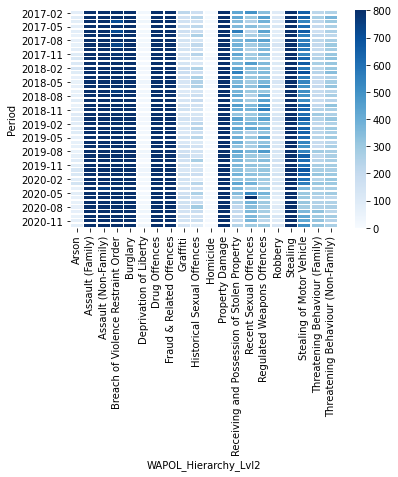

In [17]:
ax = sns.heatmap(WA_Pivot, linewidth=0.5,cmap="Blues", vmin= 0, vmax=800)
plt.show()

In [52]:
TopWACrimes = WAplot_df.groupby('WAPOL_Hierarchy_Lvl2')["COUNT_of_Offnc_ID"].sum().sort_values(ascending = False)
keyWAcrimes = TopWACrimes[0:7].index.tolist()
keyWAcrimes

['Stealing',
 'Drug Offences',
 'Burglary',
 'Property Damage',
 'Fraud & Related Offences',
 'Assault (Family)',
 'Assault (Non-Family)']

<AxesSubplot:xlabel='WAPOL_Hierarchy_Lvl2'>

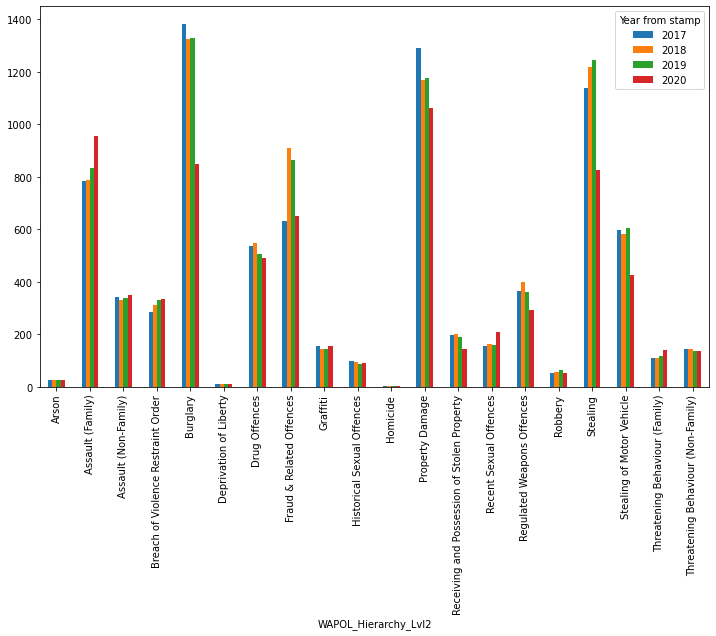

In [110]:
Yearlydf = WA_df.copy()
Yearlydf = Yearlydf[Yearlydf['Period']>dt.datetime(year=2017, month = 1, day = 1)]
Yearlydf['Year from stamp']= Yearlydf['Period'].dt.strftime('%Y')
Yearlydf['Month from stamp']= Yearlydf['Period'].dt.strftime('%m')
#Yearlydf = Yearlydf.groupby(['WAPOL_Hierarchy_Lvl2','Year from stamp'])['COUNT_of_Offnc_ID'].sum().reset_index()
#Yearlydf= Yearlydf.pivot(index='Year from stamp', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
Yearlydf=Yearlydf.groupby(['WAPOL_Hierarchy_Lvl2','Year from stamp'])['COUNT_of_Offnc_ID'].mean().reset_index()

yearlycrimespivotwa = Yearlydf.pivot(index='Year from stamp', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
YT = yearlycrimespivotwa.transpose()
YT.plot.bar(figsize=(12,7))

In [111]:
yearlycrimespivotwa

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Year from stamp,,,,,,,,,,,,,,,,,,,,
2017,27.242424,783.000000,343.060606,285.181818,1379.909091,10.772727,537.127273,629.303030,153.454545,96.590909,2.022727,1290.363636,197.545455,155.318182,366.090909,51.227273,1137.606061,595.272727,108.909091,144.318182
2018,27.166667,786.500000,331.250000,311.972222,1322.541667,11.791667,548.050000,907.888889,143.333333,94.958333,2.125000,1169.166667,202.541667,163.750000,399.166667,54.333333,1216.444444,580.000000,110.833333,142.291667
2019,27.583333,834.250000,339.111111,330.722222,1327.250000,12.125000,503.700000,863.361111,142.583333,88.416667,1.791667,1174.500000,189.666667,159.625000,360.916667,63.041667,1245.125000,602.750000,118.000000,137.250000
2020,26.805556,955.541667,348.083333,332.750000,848.583333,12.166667,490.300000,651.388889,154.916667,90.458333,2.125000,1061.708333,142.666667,209.958333,293.250000,52.750000,824.819444,425.500000,141.791667,135.916667


In [53]:
keycrimeswa_df = WAplot_df[WAplot_df['WAPOL_Hierarchy_Lvl2'].isin(keyWAcrimes)]
keycrimespivotwa = keycrimeswa_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
keycrimespivotwa

WAPOL_Hierarchy_Lvl2,Assault (Family),Assault (Non-Family),Burglary,Drug Offences,Fraud & Related Offences,Property Damage,Stealing
Period,,,,,,,
2017-02,1625.0,1016.0,2805.0,2489.0,1273.0,2757.0,7004.0
2017-03,1574.0,1064.0,2810.0,3058.0,1449.0,2993.0,7367.0
2017-04,1599.0,1067.0,2446.0,2653.0,928.0,2729.0,6534.0
2017-05,1426.0,1088.0,2838.0,2636.0,1317.0,2510.0,7422.0
2017-06,1347.0,1014.0,3033.0,2727.0,1656.0,2282.0,6847.0
2017-07,1427.0,802.0,2594.0,2687.0,2352.0,2376.0,6525.0
2017-08,1499.0,994.0,2590.0,2990.0,2284.0,2339.0,6657.0
2017-09,1504.0,1000.0,2552.0,2529.0,2299.0,2456.0,6435.0
2017-10,1692.0,1001.0,2915.0,2718.0,2449.0,2720.0,6995.0


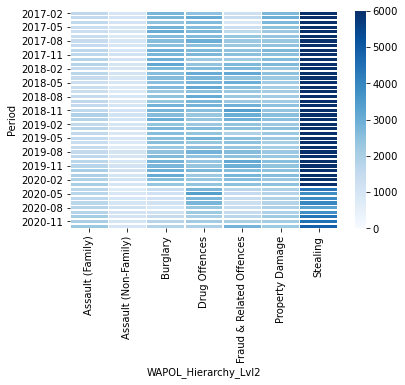

In [54]:
ax = sns.heatmap(keycrimespivotwa, linewidth=0.5,cmap="Blues", vmin=0, vmax=6000)
plt.show()

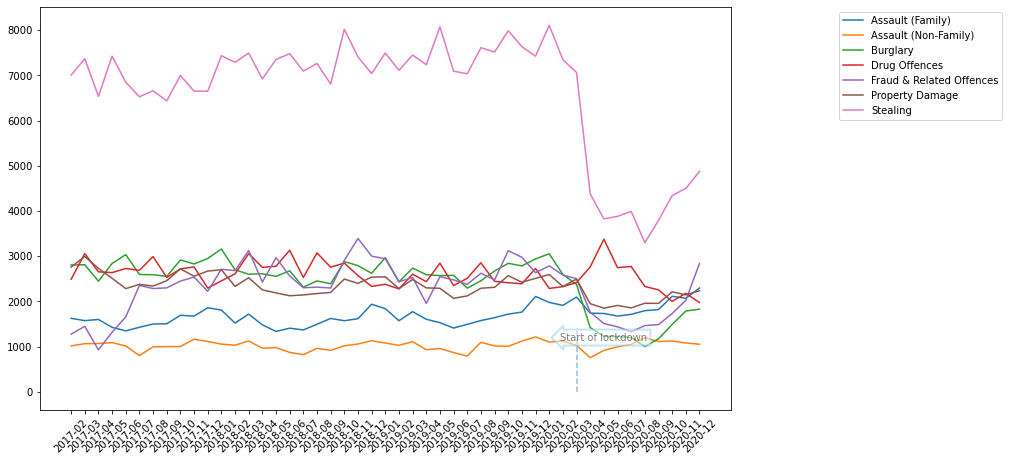

In [65]:
#line graph of key crimes 2019 to 2020
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(keycrimespivotwa)
t = axes.text(
    "2020-05", 1200, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))

#plt.annotate("Start of lockdown", ("2020-03",1200), fontsize = 12, color = "blue",alpha=0.5, arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
plt.vlines("2020-03",ymin = 0, ymax = 1400,linestyles='dashed', alpha=0.5)
#plt.ylim(0,1350)
plt.xticks(rotation=45)
plt.legend(keycrimespivotwa.columns,bbox_to_anchor = (1.4, 1.0))
plt.show()   

In [56]:
#from 2019
WAplot2019_df = WA_df.groupby(['WAPOL_Hierarchy_Lvl2','Period'])['COUNT_of_Offnc_ID'].sum().reset_index()
WAplot2019_df = WAplot2019_df[WAplot2019_df["Period"]>dt.datetime(year=2019, month = 1, day = 1)]
WAplot2019_df['Period'] = WAplot2019_df['Period'].dt.strftime('%Y-%m')

In [57]:
WA2019_Pivot = WAplot2019_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')

In [59]:
keycrimeswa2019_df = WAplot2019_df[WAplot2019_df['WAPOL_Hierarchy_Lvl2'].isin(keyWAcrimes)]
keycrimespivotwa2019 = keycrimeswa2019_df.pivot(index='Period', columns='WAPOL_Hierarchy_Lvl2', values='COUNT_of_Offnc_ID')
keycrimespivotwa2019

WAPOL_Hierarchy_Lvl2,Assault (Family),Assault (Non-Family),Burglary,Drug Offences,Fraud & Related Offences,Property Damage,Stealing
Period,,,,,,,
2019-02,1572.0,1028.0,2431.0,2276.0,2434.0,2282.0,7110.0
2019-03,1772.0,1108.0,2736.0,2602.0,2528.0,2485.0,7448.0
2019-04,1604.0,931.0,2590.0,2436.0,1955.0,2298.0,7235.0
2019-05,1529.0,957.0,2569.0,2846.0,2545.0,2289.0,8072.0
2019-06,1410.0,867.0,2575.0,2349.0,2475.0,2068.0,7090.0
2019-07,1492.0,790.0,2293.0,2511.0,2377.0,2121.0,7035.0
2019-08,1576.0,1094.0,2455.0,2853.0,2622.0,2290.0,7610.0
2019-09,1640.0,1014.0,2672.0,2444.0,2475.0,2311.0,7515.0
2019-10,1718.0,1006.0,2841.0,2411.0,3120.0,2570.0,7985.0


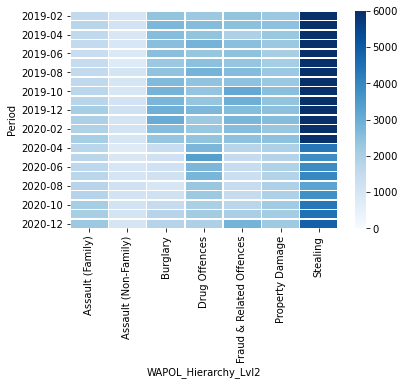

In [67]:
ax = sns.heatmap(keycrimespivotwa2019, linewidth=0.5,cmap="Blues", vmin=0, vmax=6000)
plt.savefig("WAkeycrimeheatmap.png",bbox_inches='tight')
plt.show()   

In [63]:
keycrimespivotwa2019.columns

Index(['Assault (Family)', 'Assault (Non-Family)', 'Burglary', 'Drug Offences',
       'Fraud & Related Offences', 'Property Damage', 'Stealing'],
      dtype='object', name='WAPOL_Hierarchy_Lvl2')

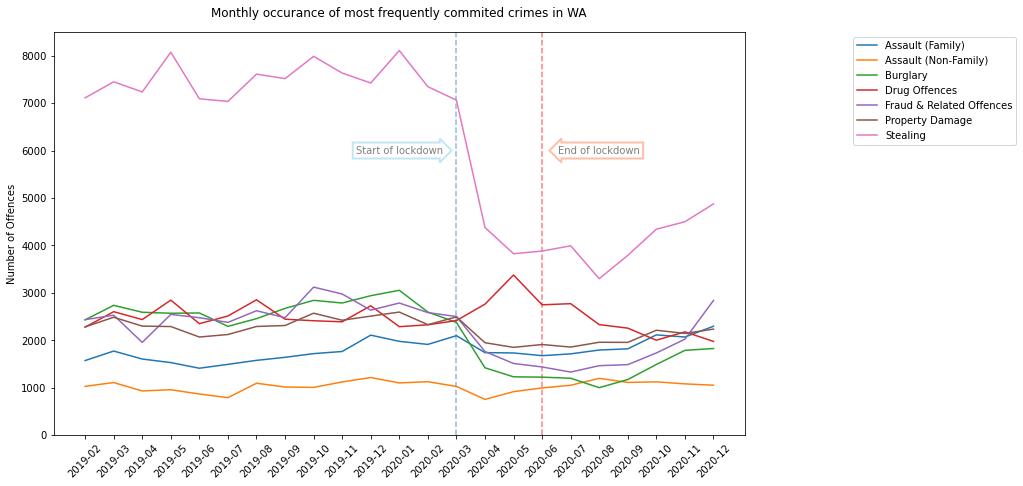

In [64]:
#line graph of key crimes 2019 to 2020
fig= plt.figure(figsize=(12,7))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(keycrimespivotwa2019)
t = axes.text(
    "2020-01", 6000, "Start of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="skyblue", alpha=0.5, lw=2))
axes.text(
    "2020-08", 6000, "End of lockdown", alpha =0.5,ha="center", va="center", rotation=0, size=10,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="coral", alpha=0.5, lw=2))

#plt.annotate("Start of lockdown", ("2020-03",1200), fontsize = 12, color = "blue",alpha=0.5, arrowprops=dict(facecolor='black', shrink=0.05),horizontalalignment='left', verticalalignment='top')
plt.vlines("2020-03",ymin = 0, ymax = 9000,linestyles='dashed', alpha=0.5)
plt.vlines("2020-06",ymin = 0, ymax = 9000, colors ="red",linestyles='dashed', alpha=0.5)
plt.ylim(0,8500)
plt.xticks(rotation=45)
plt.title("Monthly occurance of most frequently commited crimes in WA", pad=15)
plt.ylabel("Number of Offences")
plt.legend(keycrimespivotwa2019.columns,bbox_to_anchor = (1.4, 1.0))
plt.savefig("WAkeycrimetrends.png",bbox_inches='tight')
plt.show()   

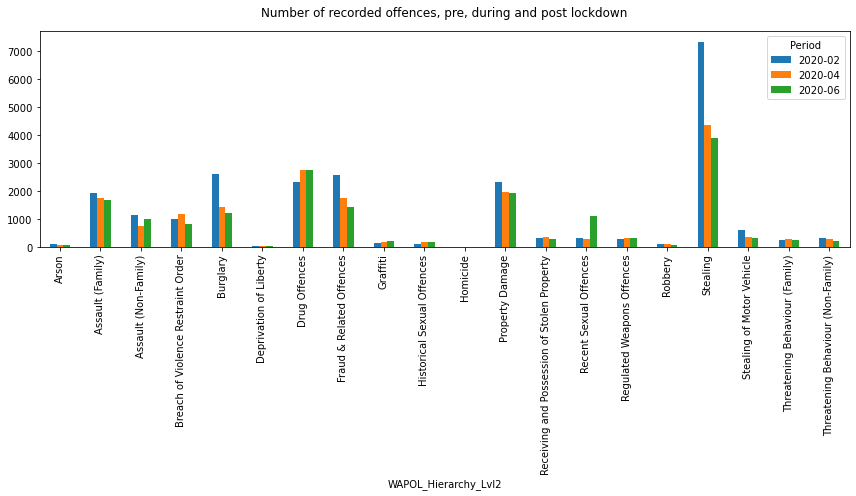

In [74]:
plotWA2 = WA2019_Pivot.reset_index()
LockdownperiodsWA = plotWA2.loc[(plotWA2["Period"]=='2020-02')|(plotWA2["Period"]=='2020-04')|(plotWA2["Period"]=='2020-06')].set_index('Period')
Transposed2 = LockdownperiodsWA.T
Transposed2.plot.bar(figsize=(12,7))
plt.title("Number of recorded offences, pre, during and post lockdown", pad=15)
plt.tight_layout()
plt.savefig("crimeswaoverperiodbar.png",bbox_inches='tight')
plt.show()


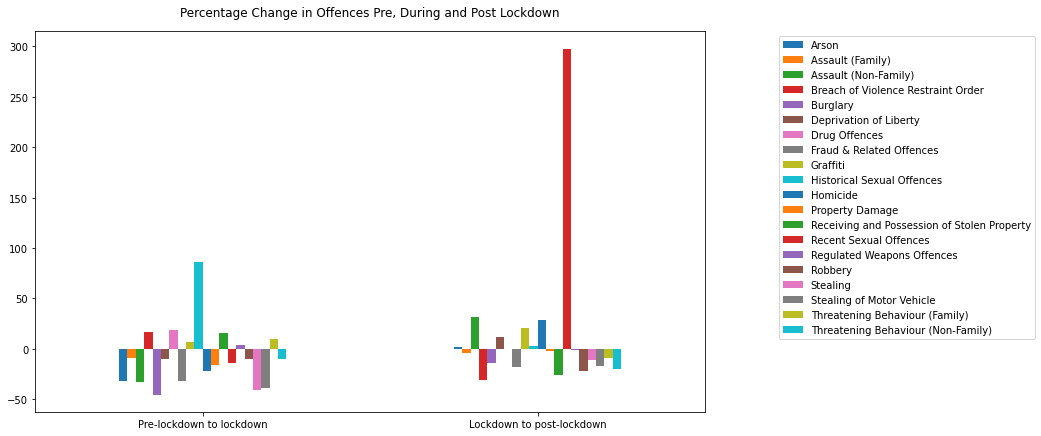

In [82]:

ChangeWA = LockdownperiodsWA.pct_change().multiply(100).round(2)
ChangeWA.dropna(axis='rows', inplace=True)
RenamedWA = ChangeWA.copy()
RenamedWA.index =["Pre-lockdown to lockdown","Lockdown to post-lockdown"]
RenamedWA.plot(kind ='bar',figsize=(12,7))

plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.title("Percentage Change in Offences Pre, During and Post Lockdown", pad=15)
plt.xticks(rotation=360)
plt.savefig("crimeswapercentchange.png",bbox_inches='tight')
plt.show()

In [118]:
standardised = pd.merge(Transposed2, yearlycrimespivotwa.T, on=["WAPOL_Hierarchy_Lvl2"])
standardised


,2020-02,2020-04,2020-06,2017,2018,2019,2020
WAPOL_Hierarchy_Lvl2,,,,,,,
Arson,88.0,60.0,61.0,27.242424,27.166667,27.583333,26.805556
Assault (Family),1912.0,1739.0,1675.0,783.000000,786.500000,834.250000,955.541667
Assault (Non-Family),1126.0,754.0,995.0,343.060606,331.250000,339.111111,348.083333
Breach of Violence Restraint Order,1006.0,1170.0,806.0,285.181818,311.972222,330.722222,332.750000
Burglary,2594.0,1419.0,1222.0,1379.909091,1322.541667,1327.250000,848.583333
Deprivation of Liberty,19.0,17.0,19.0,10.772727,11.791667,12.125000,12.166667
Drug Offences,2326.0,2761.0,2747.0,537.127273,548.050000,503.700000,490.300000
Fraud & Related Offences,2583.0,1762.0,1437.0,629.303030,907.888889,863.361111,651.388889
Graffiti,152.0,162.0,195.0,153.454545,143.333333,142.583333,154.916667


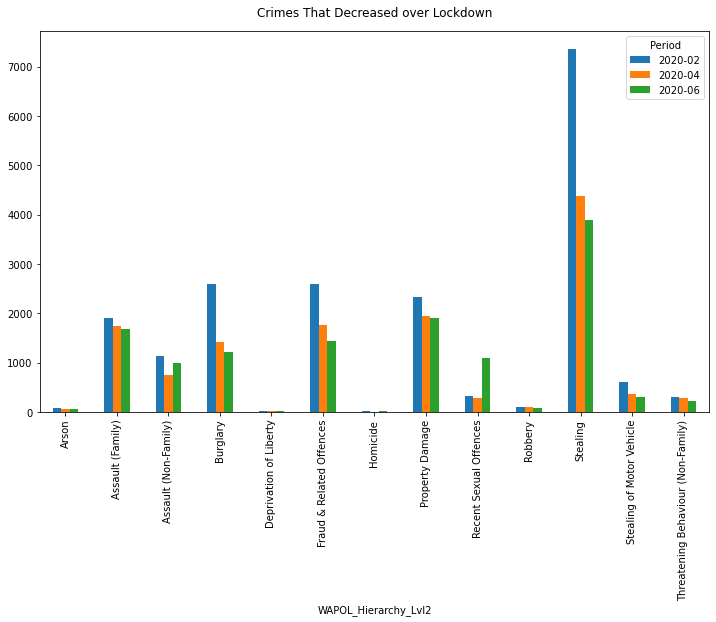

In [77]:
ChangeWAT = ChangeWA.T
CrimesWAincoverlock = ChangeWAT[ChangeWAT["2020-04"]>0]
CrimesWAdecoverlock = ChangeWAT[ChangeWAT["2020-04"]<0]
CrimesWAdecoverlock.index
Transposed2.loc[CrimesWAdecoverlock.index].plot.bar(figsize=(12,7))
plt.title("Crimes That Decreased over Lockdown", pad=15)
plt.savefig("decreasingwacrimes.png",bbox_inches='tight')
plt.show()

In [79]:
RenamedWA

WAPOL_Hierarchy_Lvl2,Arson,Assault (Family),Assault (Non-Family),Breach of Violence Restraint Order,Burglary,Deprivation of Liberty,Drug Offences,Fraud & Related Offences,Graffiti,Historical Sexual Offences,Homicide,Property Damage,Receiving and Possession of Stolen Property,Recent Sexual Offences,Regulated Weapons Offences,Robbery,Stealing,Stealing of Motor Vehicle,Threatening Behaviour (Family),Threatening Behaviour (Non-Family)
Pre-lockdown to lockdown,-31.82,-9.05,-33.04,16.30,-45.30,-10.53,18.70,-31.78,6.58,86.52,-22.22,-16.32,15.34,-13.56,3.75,-10.28,-40.41,-38.80,9.50,-10.10
Lockdown to post-lockdown,1.67,-3.68,31.96,-31.11,-13.88,11.76,-0.51,-18.44,20.37,2.41,28.57,-1.95,-25.48,297.81,-1.32,-21.88,-11.35,-16.94,-9.43,-19.93


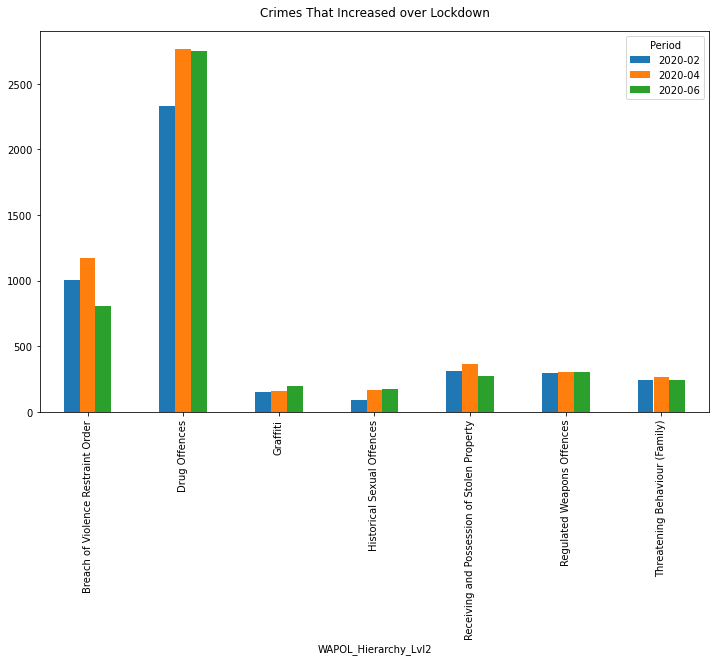

In [78]:
Transposed2.loc[CrimesWAincoverlock.index].plot.bar(figsize=(12,7))
plt.title("Crimes That Increased over Lockdown", pad=15)
plt.savefig("increasingcrimeswa.png",bbox_inches='tight')
plt.show()

## Total WA Data